# ML initial training

## Initial Import

In [2]:
import numpy as np
import csv
from helpers import*
import seaborn as sns
import matplotlib.pyplot as plt
from split_data import*
from least_squares import*
from costs import*
from build_polynomial import*

In [2]:
## Function definition

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)



## Importing the test data

In [4]:
### Data Types
dtypes = "i8,S5,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8"

#opening data storing headings in headerstest
with open('Data/test.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headerstest = next(reader)

#storing the X values into aidata
datatest = np.genfromtxt('Data/test.csv', delimiter=",",names=True, dtype=dtypes)

#transforming into a list of list
testxlist=[]
for i in datatest:
    sublist=[]
    for x in i:
        sublist.append(x)
    sublist=sublist[2:]
    testxlist.append(sublist)
    

    


In [5]:
for x in testxlist:
    x.insert(0,1)

## Importing the Train data

In [6]:
dtypes = "i8,S5,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8"
with open('Data/train.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headerstrain = next(reader)
datatrain = np.genfromtxt('Data/train.csv', delimiter=",",names=True, dtype=dtypes)

## Organizing the Train data

In [7]:

#training (s=1 b=0)
y=(datatrain['Prediction']==b's').astype(int)
#transforming features X into a list of list
trainxlist=[]
for i in datatrain:
    trainsublist=[]
    for x in i:
        trainsublist.append(x)
    trainsublist=trainsublist[2:]
    trainxlist.append(trainsublist)

#adding column of 1 
for x in trainxlist:
    x.insert(0,1)
#trainxlist is the extended X matrix

#transform into np.array
Y_total=np.array(y)
X_total=np.array(trainxlist)

## Initial features Distribution

### Histograms

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


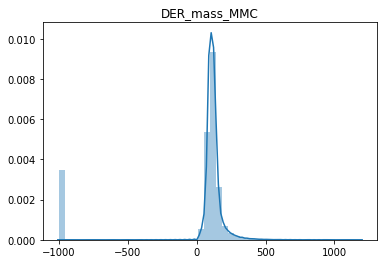

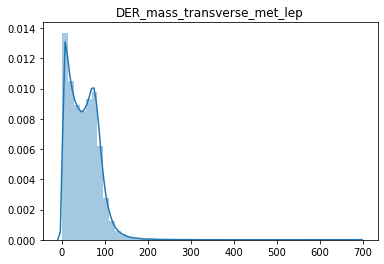

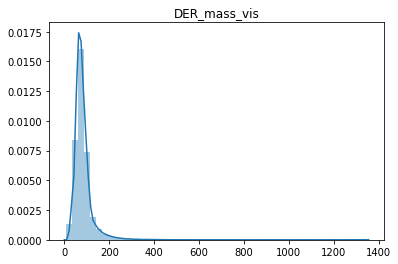

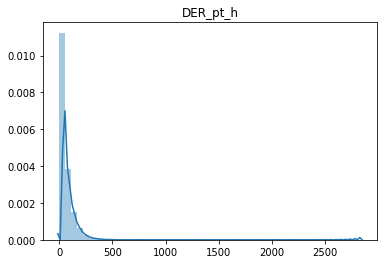

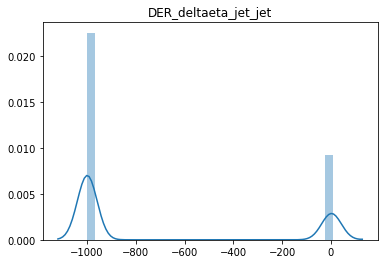

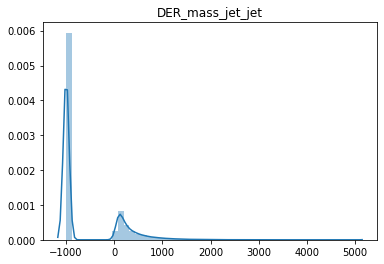

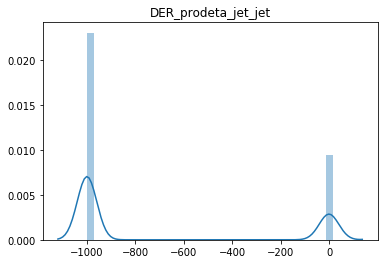

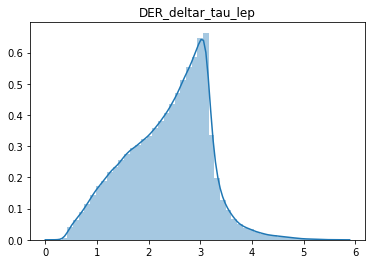

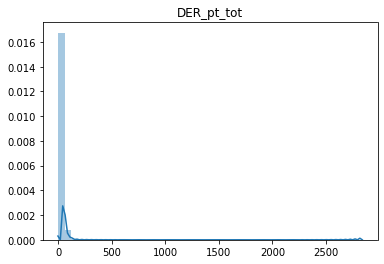

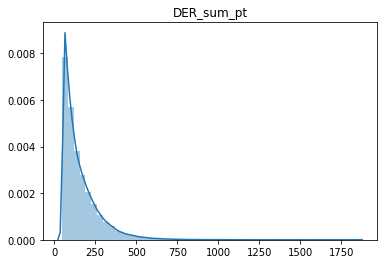

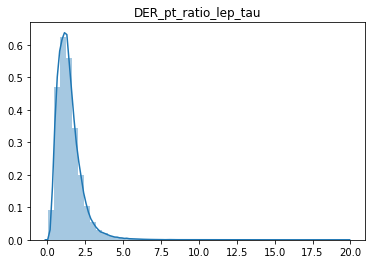

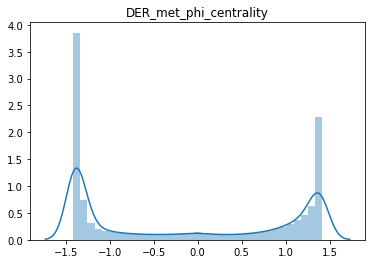

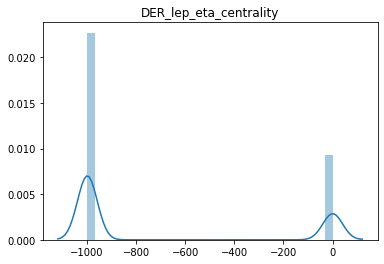

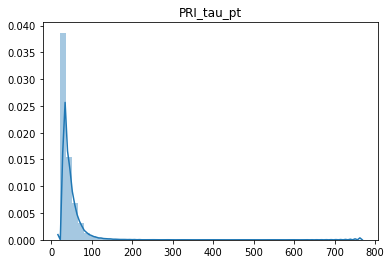

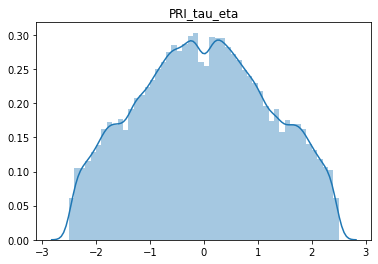

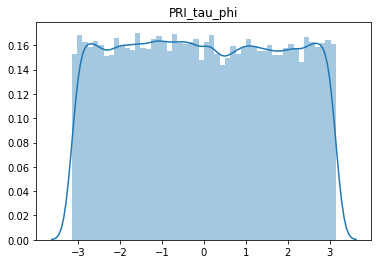

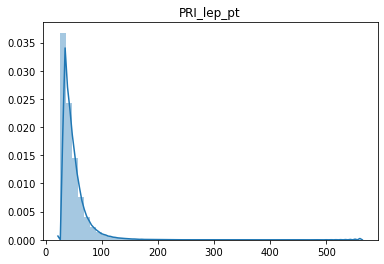

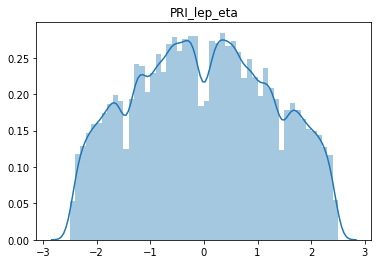

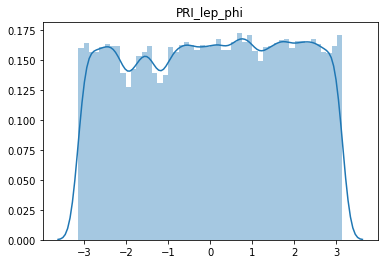

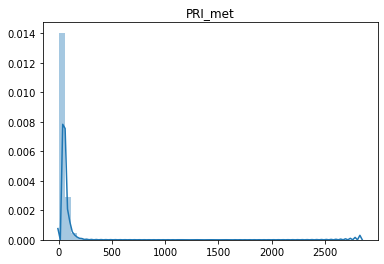

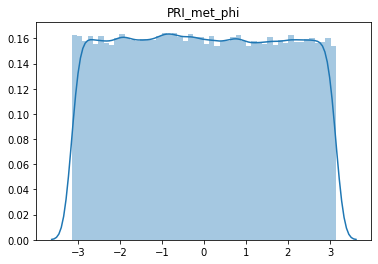

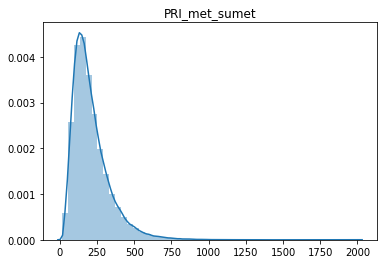

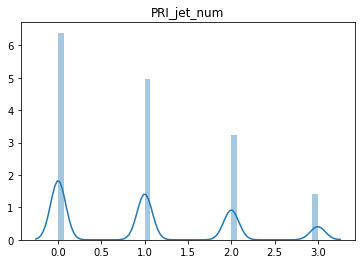

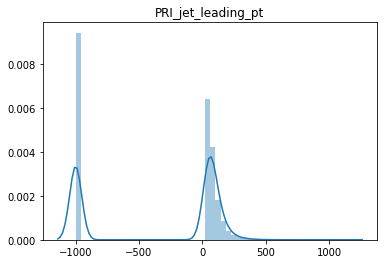

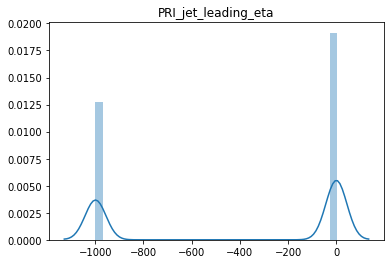

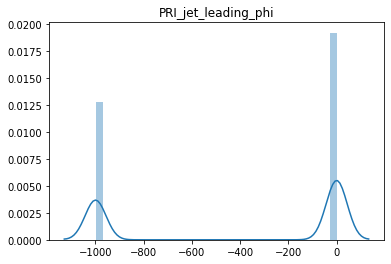

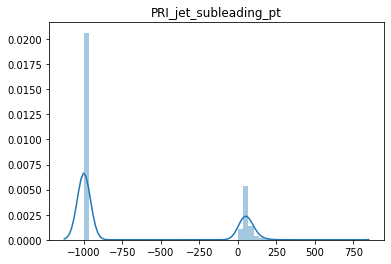

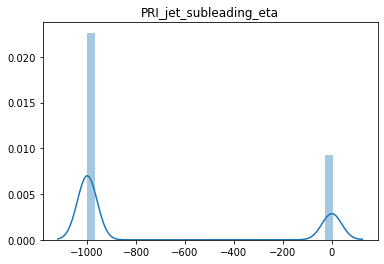

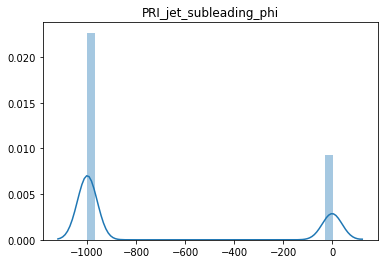

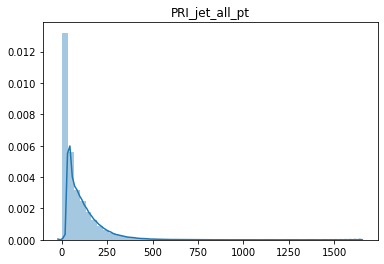

In [9]:
#histogram distribution for different features
for col in headerstrain[2:]:
    plt.figure()
    plt.title(col)
    xhist=datatrain[col]
    sns.distplot(xhist)

### Histograms split by prediction value (b vs s)

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


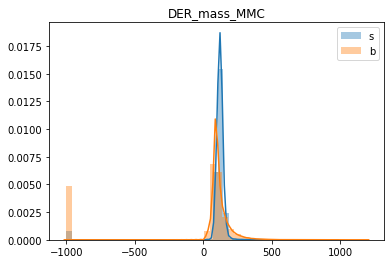

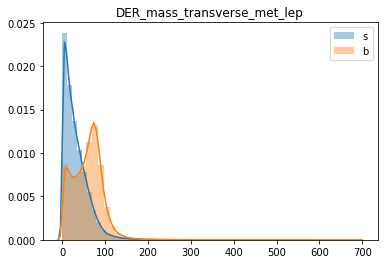

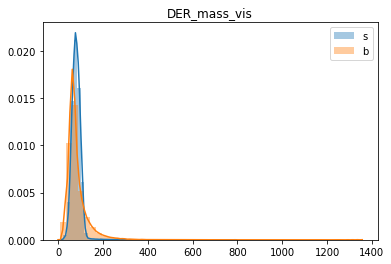

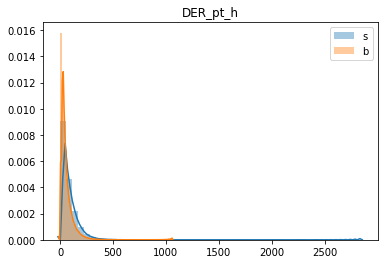

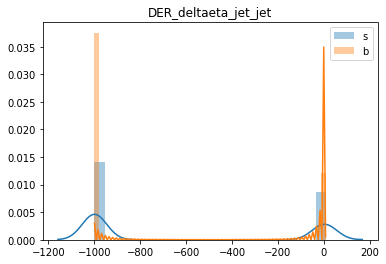

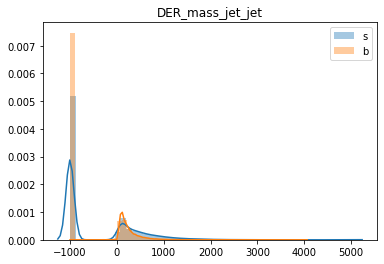

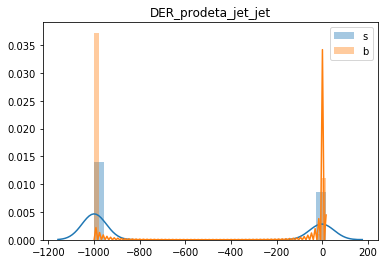

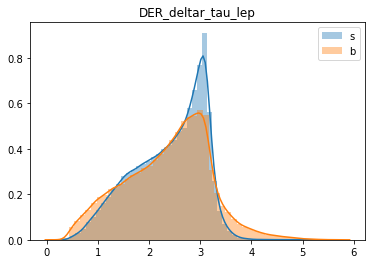

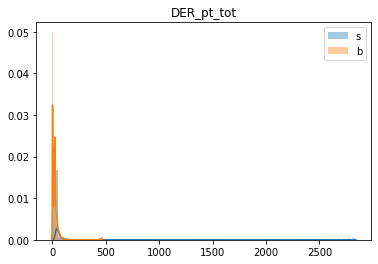

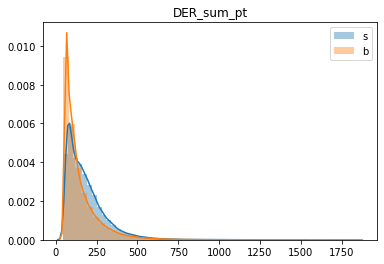

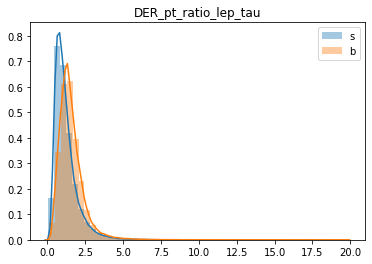

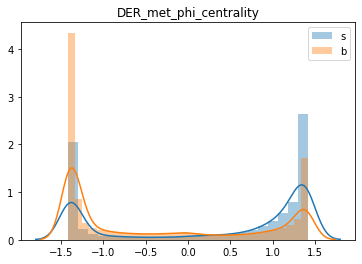

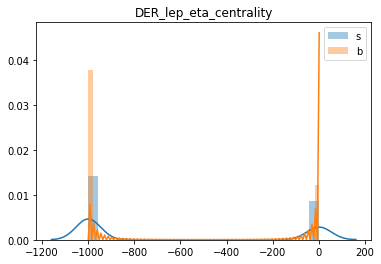

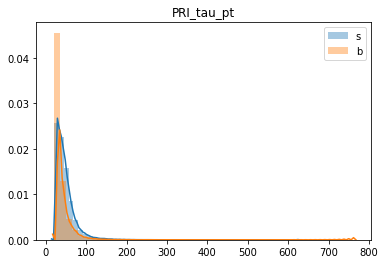

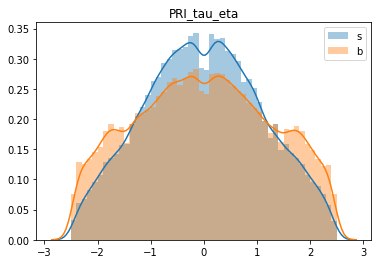

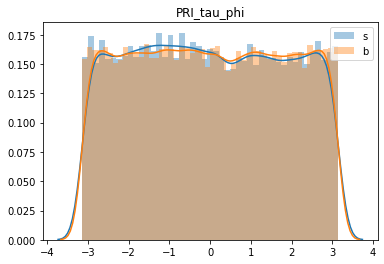

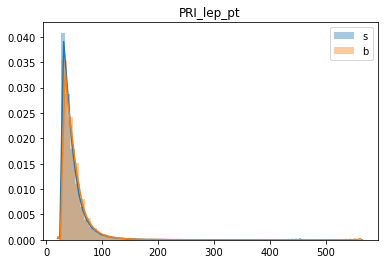

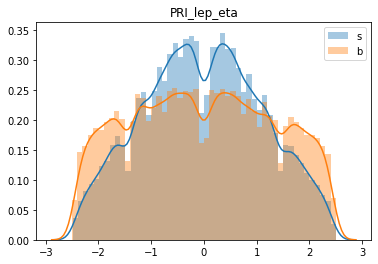

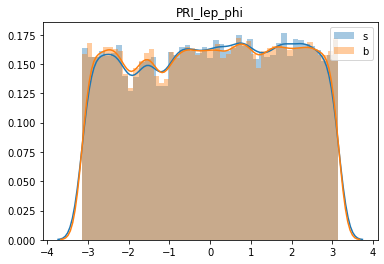

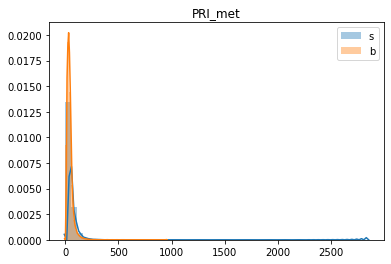

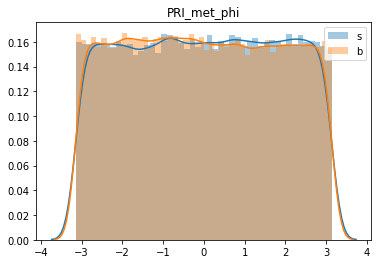

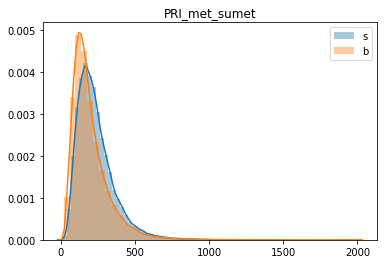

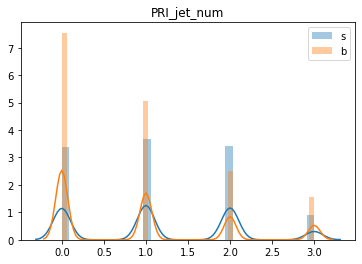

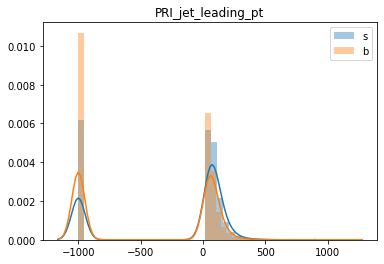

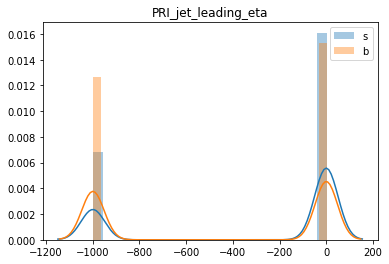

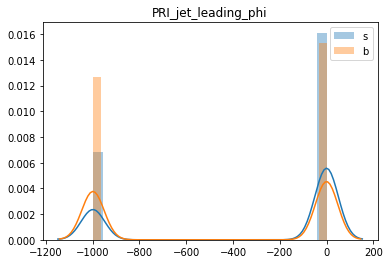

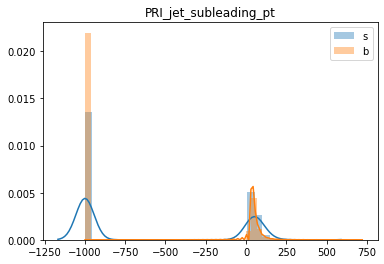

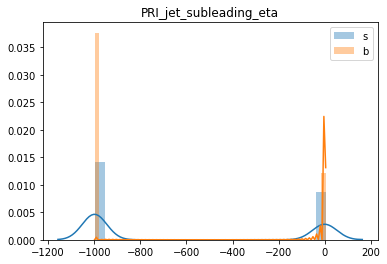

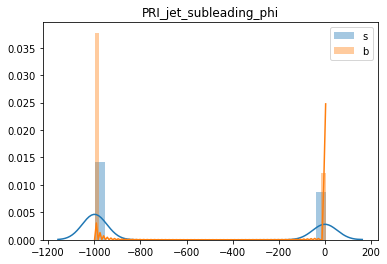

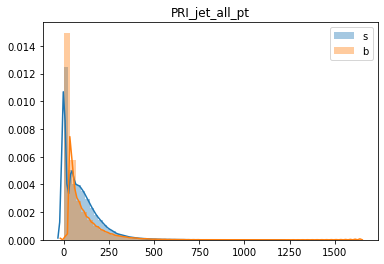

In [11]:
for col in headerstrain[2:]:
    plt.figure()
    plt.title(col)
    xhistotal=datatrain[col]
    xbs=[]
    xbb=[]
    for i in range(datatrain['Id'].size):
        if datatrain['Prediction'][i]==b's':
            xbs.append(datatrain[col][i])
        else:
            xbb.append(datatrain[col][i])
    xbs=np.array(xbs)
    xbb=np.array(xbb)
    sns.distplot(xbs, label='s')
    sns.distplot(xbb,label='b')
    plt.legend()

### Correlation

Text(0.5, 1, 'Correlation between all features')

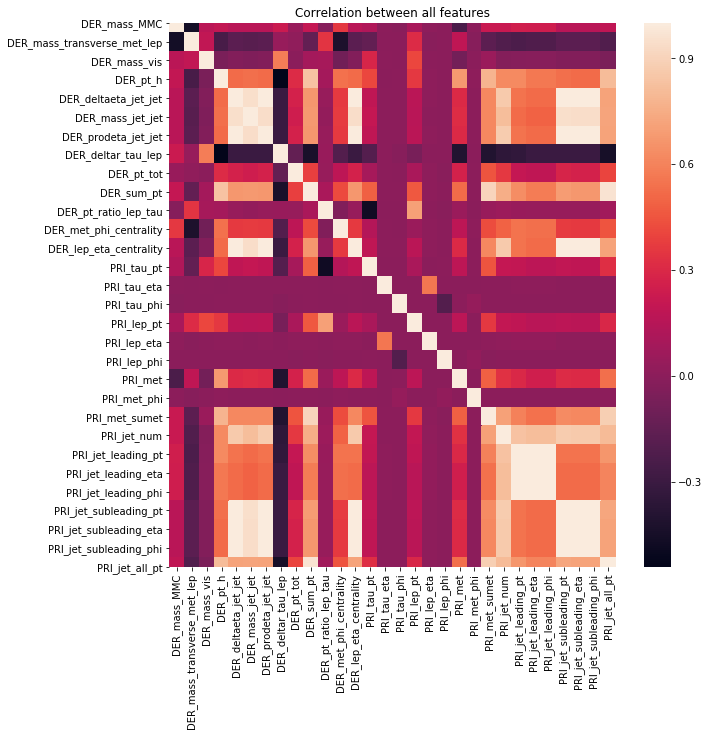

In [12]:
#Visualizing Correlation between the 30 feature variables
#initializing correlation list
listcorr=[]
for col in headerstrain[2:]:
    listcorr.append(datatrain[col])
#use seaborn to create correlation matrix
fig, ax = plt.subplots(figsize=(10,10))    
corrmatrice=np.corrcoef(listcorr)
x_axis_labels=headerstrain[2:]
y_axis_labels=headerstrain[2:]
sns.heatmap(corrmatrice,xticklabels=x_axis_labels, yticklabels=y_axis_labels, ax=ax)
plt.title('Correlation between all features')

In [23]:
arbinary=(datatrain['Prediction']==b'b').astype(int)
listcorr2=[]
for col in headerstrain[2:]:
    listcorr2.append(datatrain[col])
listcorr2.append(arbinary)
## check dimensions
np.corrcoef(listcorr2).shape

(31, 31)

Text(0.5, 1, 'Correlation with target variable Vs all features')

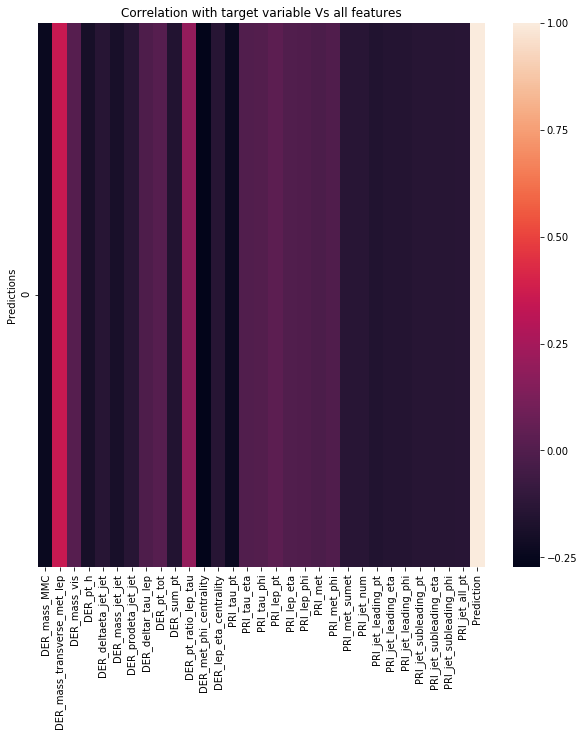

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
corrmatrice2=np.corrcoef(listcorr2)
xlabels=headerstrain[2:]
xlabels.append('Prediction')

sns.heatmap(np.array([corrmatrice2[30]]),xticklabels=xlabels, ax=ax)
plt.ylabel('Predictions')
plt.title('Correlation with target variable Vs all features')

## Cross validation to test model generalization

In [8]:
from least_squares import*
from costs import*

#initializing parameters
ratio=0.8
k_fold=5

def cross_validation(y, x, k_indices, k):
    """return training and test accuracy from k'th index in k_indices.x matrix is already extended with 1"""
    #subset of data using k'th index
    k=k_indices[k]
    Xtest=[x[i] for i in k]
    Xtrain=[item for index, item in enumerate(x) if index not in k]
    Ytest=[y[i] for i in k]
    Ytrain=[item for index, item in enumerate(y) if index not in k]

    #transform into arrays
    Xtrain=np.array(Xtrain)
    Xtest=np.array(Xtest)
    Ytrain=np.array(Ytrain)
    Ytest=np.array(Ytest)
    
    # ***************************************************
    # Least square regression
    # ***************************************************
    weights, MSE=least_squares(Ytrain, Xtrain)
    Ypred=np.dot(Xtest,weights)
    Ypredclass=(Ypred>0.5).astype(int)

    #test accuracy
    n=Ytest.shape[0]

    acc_te=np.array((Ytest.reshape(-1,1) == Ypredclass.reshape(-1,1))).sum()/n
#    acc_te = np.array([1 if i == j else 0 for i,j in zip(Ypredclass,Ytest)]).sum()/n
    #train accuracy
    nt=Ytrain.shape[0]
    ypredtrain=np.dot(Xtrain,weights)
    ypredtrainclass=(ypredtrain>0.5).astype(int)
    acc_tr=np.array((Ytrain==ypredtrainclass)).sum()/nt
    #acc_tr=np.array([1 if i == j else 0 for i,j in zip(ypredtrainclass,Ytrain)]).sum()
    
    return acc_tr, acc_te




In [9]:
np.array([1 if i == j else 0 for i,j in zip(Y_total,Y_total)]).sum()

250000

In [10]:
def call_cv(Y_cv,X_cv,k_fold,seed):
    """ take in y and x values execute cv on all k folds and retun mean train and test accuracy"""
    acctempr=[]
    acctempt=[]
    k_indices=build_k_indices(Y_cv, k_fold, seed)
    for k in range(k_fold):
        #calculate train and test accuracy for each fold
        acc_tr, acc_te=cross_validation(Y_cv, X_cv, k_indices, k)
        acctempr.append(acc_tr)
        acctempt.append(acc_te)

    #Average of train and test accuracy across folds
    meanacc_tr=np.mean(acctempr)
    meanacc_te=np.mean(acctempt)
    return meanacc_tr, meanacc_te


In [11]:
## Different Naive initial models for baseline


In [12]:
def build_poly_multi(tx, degree):
    """polynomial basis functions for input data tx, for all features expanded to d degree.Extended matrix is inputed np.array"""
    # ***************************************************
    # augmented x matrix with column of 1 input
    #list of indices for features modified
    #degrees of polynomial to apply to all features irrespectively
    # ***************************************************
    xmat=np.ones(tx.shape[0]).reshape(-1,1)
    for i in range(1,tx.shape[1]):
        for d in range(1,degree+1):
            coltmp=tx[:,i]**d
            xmat = np.append(xmat, coltmp.reshape(-1,1), axis=1)

        
    return np.array(xmat)

### LPM no NaNs

In [71]:
def delete_nan_points(x,y):
    ret_x, ret_y = zip(*[(x_point,y_point) for x_point,y_point in zip(x,y) if not np.isnan(x_point).any()])
    return np.array(ret_x), np.array(ret_y)

In [72]:
def store_nan_points(x,y):
    ret_x, ret_y = zip(*[(x_point,y_point) for x_point,y_point in zip(x,y) if np.isnan(x_point).any()])
    return np.array(ret_x), np.array(ret_y)

In [73]:
def replace_bad_data_with_nans(x):
    replacer = lambda p: p if p != -999 else np.nan
    vfunc = np.vectorize(replacer)
    return vfunc(x)

In [74]:
X_nans = replace_bad_data_with_nans(X_total)

In [75]:
X_clean, Y_clean = delete_nan_points(X_nans, Y_total)

In [76]:
meanacc_dtest = []
meanacc_dtrain = []

dtmp_tr,dtmp_te=call_cv(Y_clean,X_clean,k_fold,seed=1)
meanacc_dtest.append(dtmp_te)
meanacc_dtrain.append(dtmp_tr)

In [77]:
print(meanacc_dtest, meanacc_dtrain)

[0.7252760159736903] [0.7259047199588929]


## Removing NaNs + standardizing

In [46]:
X_clean_standardized, meanx, substd_x = standardize(X_clean)

In [47]:
dtmp_tr,dtmp_te=call_cv(Y_clean,X_clean_standardized,k_fold,seed=2)
meanacc_dtest.append(dtmp_te)
meanacc_dtrain.append(dtmp_tr)

In [48]:
print(meanacc_dtest, meanacc_dtrain)

[0.7253854059609456, 0.531742769050066, 0.725693730729702] [0.7257872715260956, 0.5317587902811421, 0.7259414225941423]


## Removing NaNs + standardize + 2-degree

In [49]:
X_clean_deg_2 = build_poly_multi(X_clean_standardized, 2)

In [50]:
dtmp_tr,dtmp_te=call_cv(Y_clean,X_clean_deg_2,k_fold,seed=2)
meanacc_dtest.append(dtmp_te)
meanacc_dtrain.append(dtmp_tr)

In [51]:
print(meanacc_dtest, meanacc_dtrain)

[0.7253854059609456, 0.531742769050066, 0.725693730729702, 0.7617677286742035] [0.7257872715260956, 0.5317587902811421, 0.7259414225941423, 0.7621779343756881]


## Removing NaNs + standardize + loop on degrees

In [83]:
meanacc_dtest = []
meanacc_dtrain = []

for degree in range(1,6):
    X_clean_degrees = build_poly_multi(X_clean_standardized, degree)
    X_clean_degrees_standardized,_,_ = standardize(X_clean_standardized)
    dtmp_tr,dtmp_te=call_cv(Y_clean,X_clean_degrees_standardized,k_fold,seed=2)
    meanacc_dtest.append(dtmp_te)
    meanacc_dtrain.append(dtmp_tr)

In [84]:
print(meanacc_dtest, meanacc_dtrain)

[0.725877965703547, 0.725877965703547, 0.725877965703547, 0.725877965703547, 0.725877965703547] [0.7257505688908464, 0.7257505688908464, 0.7257505688908464, 0.7257505688908464, 0.7257505688908464]


## Keeping NaNs separate

In [78]:
indexes = np.array(range(0,len(X_total)))
X_total_with_indexes = np.c_[indexes, X_nans]

In [79]:
X_clean, Y_clean = delete_nan_points(X_total_with_indexes, Y_total)
X_with_nans, Y_with_nans = store_nan_points(X_total_with_indexes, Y_total)

In [80]:
x_new = [X_with_nans[:,i] for i in range(X_with_nans.shape[1]) if not np.isnan(X_with_nans[:,i]).any()]
X_with_nans_clean = np.transpose(np.array(x_new))

In [81]:
x_indexes_clean = X_clean[:,0]
x_indexes_nans_clean = X_with_nans_clean[:,0]
X_clean = X_clean[:,1:]
X_with_nans_clean = X_with_nans_clean[:,1:]

In [85]:
#X_with_nans_clean_standardized, _, _ = standardize(X_with_nans_clean)
#X_clean_standardized, _, _ = standardize(X_clean)

In [91]:
meanacc_dtest = []
meanacc_dtrain = []

for degree in range(1,6):
    X_with_nans_clean_degrees = build_poly_multi(X_with_nans_clean, degree)
    X_with_nans_clean_degrees,_,_ = standardize(X_with_nans_clean_degrees)
    dtmp_tr,dtmp_te=call_cv(Y_with_nans,X_with_nans_clean_degrees,k_fold,seed=2)
    meanacc_dtest.append(dtmp_te)
    meanacc_dtrain.append(dtmp_tr)

In [92]:
print(meanacc_dtest, meanacc_dtrain)

[0.7648556222647401, 0.7773141122913505, 0.7811132370082031, 0.7794143520045743, 0.6911767940005719] [0.7650876643190552, 0.7774139988014537, 0.7813340150752941, 0.7790688724317846, 0.6906403426303145]


## Transforming AI_crowd test data

In [ ]:
X_test = np.array(testxlist) # Array from list

In [ ]:
X_test_nans = replace_bad_data_with_nans(X_test) # Replace -999 with Nans

In [ ]:
indexes = np.array(range(0,len(X_test_nans)))
X_test_with_indexes = np.c_[indexes, X_test_nans] # Prepend indices to recognize predictions

In [ ]:
# Separate points with and without NaNs

X_test_clean_with_indexes, _ = delete_nan_points(X_test_with_indexes, np.ones(shape=(X_test.shape[0])))
X_test_with_nans_indexes, _ = store_nan_points(X_test_with_indexes, np.ones(shape=(X_test.shape[0])))

In [ ]:
# Take away NaN features from points with nans

tmp = [X_test_with_nans_indexes[:,i] for i in range(X_test_with_nans_indexes.shape[1]) if not np.isnan(X_test_with_nans_indexes[:,i]).any()]
X_test_with_nans_clean_indexes = np.transpose(np.array(tmp))

In [ ]:
# Store indexes and delete from data

X_test_indexes_clean = X_test_clean_with_indexes[:,0]
X_test_indexes_nans_clean = X_test_with_nans_clean_indexes[:,0]
X_test_clean = X_test_clean_with_indexes[:,1:]
X_test_with_nans_clean = X_test_with_nans_clean_indexes[:,1:]

In [ ]:
# Standardizing both dataset

X_test_clean_standardized, _, _ = standardize(X_test_clean)
X_test_with_nans_clean_standardized, _, _ = standardize(X_test_with_nans_clean)

In [ ]:
def probability_to_prediction(y):
    replacer = lambda p: 1 if p > 0.5 else -1
    vfunc = np.vectorize(replacer)
    return vfunc(y)

In [ ]:
def execute_lpm_model_1(x_train, x_train_nans, y_train, y_train_nans, x_test, x_test_nans, indices, indices_nans, degree=4):
    
    # Building train data through poly expansion
    x_train_expanded = build_poly_multi(x_train, degree)
    x_train_nans_expanded = build_poly_multi(x_train_nans, degree)
    x_test_expanded = build_poly_multi(x_test, degree)
    x_test_nans_expanded = build_poly_multi(x_test_nans, degree)
    
    # Building ws
    ws, _ = least_squares(y_train, x_train_expanded)
    ws_nans, _ = least_squares(y_train_nans, x_train_nans_expanded)
    
    # Building predictions
    y_test_prob = x_test_expanded.dot(ws)
    y_test_nans_prob = x_test_nans_expanded.dot(ws_nans)
    
    y_test = probability_to_prediction(y_test_prob)
    y_test_nans = probability_to_prediction(y_test_nans_prob)
    
    # Merging predictions
    y_test_indexed = np.c_[indices, y_test]
    y_test_nans_indexed = np.c_[indices_nans, y_test_nans]
    y_test_indexed = np.concatenate((y_test_indexed, y_test_nans_indexed))
    
    i=np.argsort(y_test_indexed[:,0]) # Order by indices
    y_test=y_test_indexed[i]
    
    return y_test[:,1]

In [ ]:
y = execute_lpm_model_1(X_clean_standardized, X_with_nans_clean_standardized, Y_clean, Y_with_nans, X_test_clean_standardized, X_test_with_nans_clean_standardized, X_test_indexes_clean, X_test_indexes_nans_clean, 4)

In [ ]:
ids = datatest[['Id']]

y_final = np.c_[np.array(ids, dtype=np.int64), y]

np.savetxt("submission.csv", y_final, delimiter=',', header="Id,Prediction", comments="", fmt='%d')

## Logistic varying degrees

In [93]:
# TODO: MOVE TO OTHER FILE

def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
            
    # compute gradient and loss    
    g = calculate_gradient(y, tx, w)
    loss = calculate_loss(y, tx, w)

    # update w by gradient
    w = w - gamma*g

    return loss, w

def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    
    return np.transpose(tx).dot(sigmoid(tx.dot(w)) - y)

def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""

    return np.sum(-y*tx.dot(w) + np.log(1 + np.exp(tx.dot(w))))

def sigmoid(t):
    """apply the sigmoid function on t."""
    
    return 1 / (1 + np.exp(-t))

In [94]:
def logistic_regression(y, x, gamma, max_iter, initial_w):
    w = initial_w
    threshold = 1e-8
    losses = []
    
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, x, w, gamma)
        # log info
        #if iter % 100 == 0:
        print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break

In [95]:
#from logit_functions import*

def cross_validation_logit(y, x, k_indices, k, initials_w, gamma, max_iters):
    """return training and test accuracy from k'th index in k_indices.x input is already expanded"""
    #subset of data using k'th index
    k=k_indices[k]
    Xtest=[x[i] for i in k]
    Xtrain=[item for index, item in enumerate(x) if index not in k]
    Ytest=[y[i] for i in k]
    Ytrain=[item for index, item in enumerate(y) if index not in k]

    #transform into arrays
    Xtrain=np.array(Xtrain)
    Xtest=np.array(Xtest)
    Ytrain=np.array(Ytrain)
    Ytest=np.array(Ytest)
    
    # ***************************************************
    # Least square regression
    # ***************************************************
    w, loss=logistic_regression(Ytrain.reshape(-1,1),Xtrain,initials_w,max_iters,gamma)


    #test accuracy
    acc_te=logistic_accuracy(Ytest.reshape(-1,1), Xtest, w)
    #train accuracy
    acc_tr=logistic_accuracy(Ytrain.reshape(-1,1), Xtrain, w)
    
    return acc_tr, acc_te

def call_cv_logit(Y_cv,X_cv,k_fold,seed,initials_w, gamma, max_iters):
    """ take in y and x values execute cv on all k folds and retun mean train and test accuracy"""
    acctempr=[]
    acctempt=[]
    k_indices=build_k_indices(Y_cv, k_fold, seed)
    for k in range(k_fold):
        #calculate train and test accuracy for each fold
        acc_tr, acc_te=cross_validation_logit(Y_cv, X_cv, k_indices, k,initials_w, gamma, max_iters)
        acctempr.append(acc_tr)
        acctempt.append(acc_te)

    #Average of train and test accuracy across folds
    meanacc_tr=np.mean(acctempr)
    meanacc_te=np.mean(acctempt)
    
    return meanacc_tr, meanacc_te


In [355]:
degrees=range(1,5)
meanacc_dtest_logit=[]
meanacc_dtrain_logit=[]
#initializing parameters
ratio=0.8
k_fold=5
max_iters = 100
gamma = 0.01
seed=1


for d in degrees:

    Xn=build_poly_multi(X_total,d)
    initials_w = np.zeros((Xn.shape[1], 1))
    dtmp_tr,dtmp_te=call_cv_logit(Y_total.reshape(-1,1),Xn,k_fold,seed,initials_w, gamma, max_iters)
    meanacc_dtest_logit.append(dtmp_te)
    meanacc_dtrain_logit.append(dtmp_tr)
    

NameError: name 'logistic_regression' is not defined

#### Logistic varyng degree with SGD

In [37]:
def logistic_regression_Sgd(y,tx,initials_w,max_iters,gamma,batchsize=1):
    w=initials_w
    losses = []
    threshold = 1e-8
    
    print("Entering")
    
    for i in range(max_iters):
        print("SGD step", i)
        loss, w= stochastic_gradient_descent(y, tx, initials_w, max_iters, gamma, batchsize)
        losses.append(loss)
        if len(losses) > 1:
            print(losses[-1], losses[-2])
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
        
    return w, loss

In [35]:
def cross_validation_logitSGD(y, x, k_indices, k, initials_w, gamma, max_iters):
    """return training and test accuracy from k'th index in k_indices.x input is already expanded"""
    #subset of data using k'th index
    
    print("Building data for xvalidation")
    
    k=k_indices[k]
    Xtest=[x[i] for i in k]
    Xtrain=[item for index, item in enumerate(x) if index not in k]
    Ytest=[y[i] for i in k]
    Ytrain=[item for index, item in enumerate(y) if index not in k]

    #transform into arrays
    Xtrain=np.array(Xtrain)
    Xtest=np.array(Xtest)
    Ytrain=np.array(Ytrain)
    Ytest=np.array(Ytest)
    
    print("Built data for xvalidation")
    
    # ***************************************************
    # Least square regression
    # ***************************************************
    w, loss=logistic_regression_Sgd(Ytrain.reshape(-1,1),Xtrain,initials_w,max_iters,gamma)


    #test accuracy
    acc_te=logistic_accuracy(Ytest.reshape(-1,1), Xtest, w)
    #train accuracy
    acc_tr=logistic_accuracy(Ytrain.reshape(-1,1), Xtrain, w)
    
    return acc_tr, acc_te

def call_cv_logitSGD(Y_cv,X_cv,k_fold,seed,initials_w, gamma, max_iters):
    """ take in y and x values execute cv on all k folds and retun mean train and test accuracy"""
    acctempr=[]
    acctempt=[]
    k_indices=build_k_indices(Y_cv, k_fold, seed)
    for k in range(k_fold):
        print("K =", k)
        #calculate train and test accuracy for each fold
        acc_tr, acc_te=cross_validation_logitSGD(Y_cv, X_cv, k_indices, k,initials_w, gamma, max_iters)
        acctempr.append(acc_tr)
        acctempt.append(acc_te)

    #Average of train and test accuracy across folds
    meanacc_tr=np.mean(acctempr)
    meanacc_te=np.mean(acctempt)
    
    return meanacc_tr, meanacc_te


In [38]:
degrees=range(1,5)
meanacc_dtest_logit=[]
meanacc_dtrain_logit=[]
#initializing parameters
ratio=0.8
k_fold=5
max_iters = 100
gamma = 0.01
seed=1


for d in degrees:
    print(d)
    if d==1:
        Xn=X_total
    if d>1:
        Xn=build_poly_multi(X_total,d)
    initials_w = np.zeros((Xn.shape[1], 1))
    dtmp_tr,dtmp_te=call_cv_logitSGD(Y_total.reshape(-1,1),Xn,k_fold,seed,initials_w, gamma, max_iters)
    meanacc_dtest_logit.append(dtmp_te)
    meanacc_dtrain_logit.append(dtmp_tr)

1
K = 0
Building data for xvalidation
Built data for xvalidation
Entering
SGD step 0
SGD step 1
inf inf
SGD step 2


<ipython-input-37-4a6d48f23a31>:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:


inf inf
SGD step 3


KeyboardInterrupt: 

## Logistic with nans cleaned

In [96]:
meanacc_dtest = []
meanacc_dtrain = []
k_fold = 3
gamma = 0.000001
max_iters = 200
seed= 1

for degree in range(1,5):
    X_with_nans_clean_degrees = build_poly_multi(X_with_nans_clean_standardized, degree)
    X_clean_degrees = build_poly_multi(X_clean_standardized, degree)
    initials_w_clean = np.ones(X_clean_degrees.shape[1])
    initials_w_nans = np.ones(X_with_nans_clean_degrees.shape[1])

    dtmp_tr,dtmp_te=call_cv_logit(Y_clean,X_clean_degrees,k_fold,seed,initials_w_clean, gamma, max_iters)
    meanacc_dtest.append(dtmp_te)
    meanacc_dtrain.append(dtmp_tr)
    
    dtmp_tr,dtmp_te=call_cv_logit(Y_with_nans,X_with_nans_clean_degrees,k_fold,seed,initials_w_nans, gamma, max_iters)
    meanacc_dtest.append(dtmp_te)
    meanacc_dtrain.append(dtmp_tr)

Current iteration=0, loss=975750.2137735543


<ipython-input-93-2658d3b813f7>:31: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-t))
<ipython-input-93-2658d3b813f7>:26: RuntimeWarning: overflow encountered in exp
  return np.sum(-y*tx.dot(w) + np.log(1 + np.exp(tx.dot(w))))


Current iteration=1, loss=inf
Current iteration=2, loss=inf


<ipython-input-94-d80e2a0c263d>:14: RuntimeWarning: invalid value encountered in double_scalars
  if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:


Current iteration=3, loss=inf
Current iteration=4, loss=inf
Current iteration=5, loss=inf
Current iteration=6, loss=inf
Current iteration=7, loss=inf
Current iteration=8, loss=inf
Current iteration=9, loss=inf
Current iteration=10, loss=inf
Current iteration=11, loss=inf


KeyboardInterrupt: 

## Other methods to test
-standardizing lpm
-standardizing logit
-knn
-oversample datasets

In [ ]:
#### Standardized - LPM CV different degrees

In [45]:
def standardize(x):
    """Standardize the original data set ignoring column of 1."""
    xnew=x
    subx=x[:,1:]
    mean_x = np.mean(subx, axis=0)
    subx = subx - mean_x
    substd_x = np.std(subx, axis=0)
    subx = subx / substd_x
    xnew[:,1:]=subx
    return xnew, mean_x, substd_x


In [5]:
degrees=range(1,5)
meanacc_dtest=[]
meanacc_dtrain=[]
#initializing parameters
ratio=0.8
k_fold=5
seed=1

Xstd, meanx,stdx =standardize(X_total)
Ystd, meany,stdy =standardize(Y_total.reshape(-1,1))
for d in degrees:
    Xn=build_poly_multi(Xstd,d)
    dtmp_tr,dtmp_te=call_cv(Ystd,Xn,k_fold,seed)
    meanacc_dtest.append(dtmp_te)
    meanacc_dtrain.append(dtmp_tr)
    

NameError: name 'X_total' is not defined

In [24]:
print(meanacc_dtest,meanacc_dtrain)

[0.74478, 0.77056, 0.654836, 0.587392] [0.744954, 0.770777, 0.6548360000000001, 0.5866490000000001]


#### Separating datasets in NANs and Not NANs
Maybe this will allow for better predictions

In [50]:
def cleaningNANS(X_total, Y_total):
    X_totalp1=X_total
    Y_totalp1=Y_total.reshape(-1,1)
    X_totalp2=[]
    Y_totalp2=[]
    for i in range(1,31):
        for j in range(X_total.shape[0]):
            if X_total[j,i]==-999:
                X_totalp2.append(X_total[j,:])
                Y_totalp2.append(Y_total.reshape(-1,1)[j,:])
                np.delete(X_totalp1, j, axis=0)
                np.delete(Y_totalp1,j,axis=0)
    X_totalp2=np.array(X_totalp2)
    Y_totalp2=np.array(Y_totalp2)
    return X_totalp1, X_totalp2,Y_totalp1, Y_totalp2


### Replacing NaNs with median

In [ ]:
def replace_nans_with_median(x):
    for col in range(x.shape[1]):
        m = np.nanmedian(x[:,col])
        nan_to_median = lambda p: p if not np.isnan(p) else m
        vfunc = np.vectorize(nan_to_median)
        x[:,col] = vfunc(x[:,col])

In [ ]:
Xn=build_poly_multi(X_total,d)
initials_w = np.zeros((Xn.shape[1], 1))
dtmp_tr,dtmp_te=call_cv_logit(Y_total.reshape(-1,1),Xn,k_fold,seed,initials_w, gamma, max_iters)
meanacc_dtest_logit.append(dtmp_te)
meanacc_dtrain_logit.append(dtmp_tr)